# Demo of the scikit-learn fork iRF

* The following is a demo of the scikit learn iRF code

## Typical Setup


### Import the required dependencies

* In particular `irf_utils` and `irf_jupyter_utils`

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
import numpy as np
from functools import reduce

# Needed for the scikit-learn wrapper function
import irf
from irf import irf_utils
from irf import irf_jupyter_utils
from irf.ensemble.forest import RandomForestClassifier
from math import ceil

# Import our custom utilities
from imp import reload


## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [6]:
load_breast_cancer = load_breast_cancer()

In [7]:
X_train, X_test, y_train, y_test, rf = irf_jupyter_utils.generate_rf_example(n_estimators=20, 
                                                                             feature_weight=None)

## Check out the data

In [8]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 2 rows of the training set features", X_train[:2], sep = ":\n")
print("\n")
print("first 2 rows of the training set outcomes", y_train[:2], sep = ":\n")

Training feature dimensions:
(512, 30)


Training outcome dimensions:
(512,)


Test feature dimensions:
(57, 30)


Test outcome dimensions:
(57,)


first 2 rows of the training set features:
[[  1.98900000e+01   2.02600000e+01   1.30500000e+02   1.21400000e+03
    1.03700000e-01   1.31000000e-01   1.41100000e-01   9.43100000e-02
    1.80200000e-01   6.18800000e-02   5.07900000e-01   8.73700000e-01
    3.65400000e+00   5.97000000e+01   5.08900000e-03   2.30300000e-02
    3.05200000e-02   1.17800000e-02   1.05700000e-02   3.39100000e-03
    2.37300000e+01   2.52300000e+01   1.60500000e+02   1.64600000e+03
    1.41700000e-01   3.30900000e-01   4.18500000e-01   1.61300000e-01
    2.54900000e-01   9.13600000e-02]
 [  2.01800000e+01   1.95400000e+01   1.33800000e+02   1.25000000e+03
    1.13300000e-01   1.48900000e-01   2.13300000e-01   1.25900000e-01
    1.72400000e-01   6.05300000e-02   4.33100000e-01   1.00100000e+00
    3.00800000e+00   5.24900000e+01   9.08700000e-03   2.71500000e-02
  

## Step 2: Get all Random Forest and Decision Tree Data

* Extract in a single dictionary the random forest data and for all of it's decision trees
* This is as required for RIT purposes

In [9]:
all_rf_tree_data = irf_utils.get_rf_tree_data(
    rf=rf, X_train=X_train, X_test=X_test, y_test=y_test)

## STEP 3: Get the RIT data and produce RITs

In [10]:
np.random.seed(12)
all_rit_tree_data = irf_utils.get_rit_tree_data(
    all_rf_tree_data=all_rf_tree_data,
    bin_class_type=1,
    M=100,
    max_depth=2,
    noisy_split=False,
    num_splits=2)

# Perform Manual CHECKS on the `irf_utils`
* These should be converted to unit tests and checked with `nosetests -v test_irf_utils.py`

# Step 4: Plot some Data

### List Ranked Feature Importances

In [11]:
# Print the feature ranking
print("Feature ranking:")

feature_importances_rank_idx = all_rf_tree_data['feature_importances_rank_idx']
feature_importances = all_rf_tree_data['feature_importances']

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))

Feature ranking:
1. feature 20 (0.269505)
2. feature 23 (0.166292)
3. feature 22 (0.125083)
4. feature 27 (0.095908)
5. feature 7 (0.047362)
6. feature 6 (0.041892)
7. feature 3 (0.038964)
8. feature 26 (0.038608)
9. feature 0 (0.037853)
10. feature 24 (0.015405)
11. feature 28 (0.013661)
12. feature 21 (0.012163)
13. feature 1 (0.011433)
14. feature 25 (0.009299)
15. feature 2 (0.009179)
16. feature 10 (0.007583)
17. feature 13 (0.007535)
18. feature 29 (0.006910)
19. feature 12 (0.006683)
20. feature 4 (0.005703)
21. feature 17 (0.005578)
22. feature 15 (0.004319)
23. feature 16 (0.003881)
24. feature 9 (0.003759)
25. feature 5 (0.003555)
26. feature 19 (0.003329)
27. feature 14 (0.002782)
28. feature 8 (0.002763)
29. feature 18 (0.001688)
30. feature 11 (0.001323)


### Plot Ranked Feature Importances

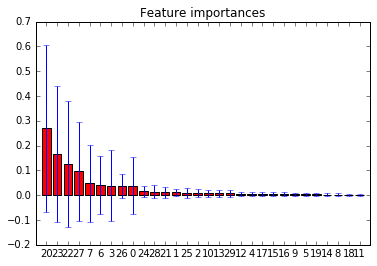

In [12]:
# Plot the feature importances of the forest
feature_importances_std = all_rf_tree_data['feature_importances_std']

plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Decision Tree 0 (First) - Get output

### Check the output against the decision tree graph

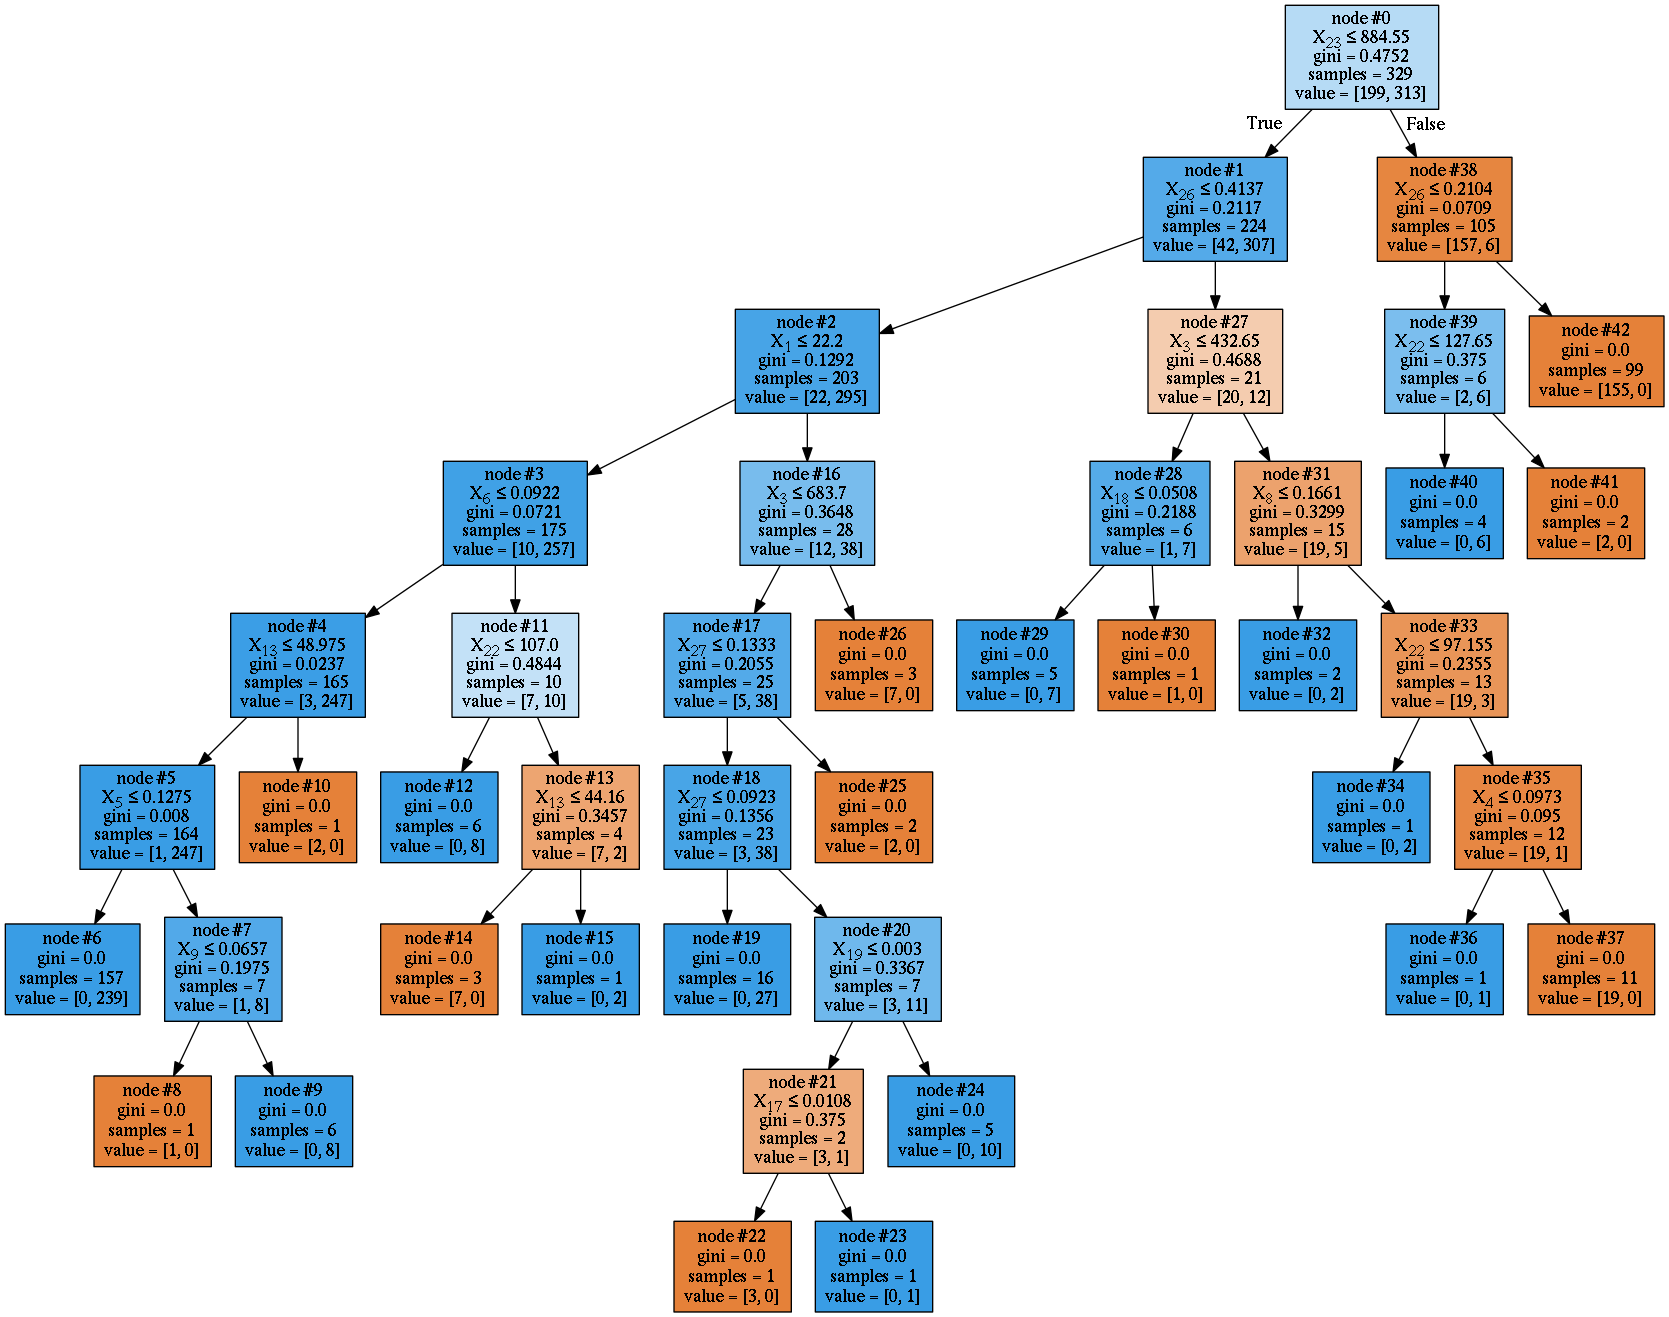

In [13]:
# Now plot the trees individually
irf_jupyter_utils.draw_tree(decision_tree = all_rf_tree_data['rf_obj'].estimators_[0])

## Compare to our dict of extracted data from the tree

In [14]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0'])

In [15]:
# Count the number of samples passing through the leaf nodes
sum(all_rf_tree_data['dtree0']['tot_leaf_node_values'])

512

### Check output against the diagram

In [16]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0']['all_leaf_paths_features'])

# Run the iRF function

We will run the iRF with the following **parameters**

#### Data:
* breast cancer binary classification data
* **random state (for reproducibility):** 2018

#### Weighted RFs
* **K:** 5 iterations
* **number of trees:** 20

#### Bootstrap RFs
* **proportion of bootstrap samples:** 20%
* **B:** 30 bootstrap samples
* **number of trees (bootstrap RFs):** 5 iterations

#### RITs (on the bootstrap RFs)
* **M:** 20 RITs per forest
* **filter label type:** 1-class only
* **Max Depth:** 5
* **Noisy Split:** False
* **Number of splits at Node:** 2 splits

# Running the iRF is easy - single function call

* All of the bootstrap, RIT complexity is covered through the key parameters passed through
in the main algorithm (as listed above)
* This function call returns the following data:
    1. all RF weights
    2. all the K RFs that are iterated over
    3. all of the B bootstrap RFs that are run
    4. all the B*M RITs that are run on the bootstrap RFs
    5. the stability score
    
### This is a lot of data returned!

Will be useful when we build the **interface** later

### Let's run it!

In [17]:
all_rf_weights, all_K_iter_rf_data, \
all_rf_bootstrap_output, all_rit_bootstrap_output, \
stability_score = irf_utils.run_iRF(X_train=X_train,
                                    X_test=X_test,
                                    y_train=y_train,
                                    y_test=y_test,
                                    K=5,
                                    n_estimators=20,
                                    B=30,
                                    random_state_classifier=2018,
                                    propn_n_samples=.2,
                                    bin_class_type=1,
                                    M=20,
                                    max_depth=5,
                                    noisy_split=False,
                                    num_splits=2,
                                    n_estimators_bootstrap=5)

In [18]:
stability_score

{'1_21_22_27': 0.03333333333333333,
 '1_22': 0.03333333333333333,
 '1_22_27': 0.03333333333333333,
 '1_23_27': 0.1,
 '1_6_21_23_27': 0.03333333333333333,
 '1_7_22': 0.06666666666666667,
 '1_7_22_27': 0.03333333333333333,
 '20': 0.3,
 '20_21': 0.03333333333333333,
 '20_21_22': 0.03333333333333333,
 '20_21_22_27': 0.06666666666666667,
 '20_21_27': 0.03333333333333333,
 '20_22': 0.13333333333333333,
 '20_22_23': 0.03333333333333333,
 '20_22_27': 0.06666666666666667,
 '20_23': 0.03333333333333333,
 '20_23_27': 0.03333333333333333,
 '20_27': 0.1,
 '21': 0.16666666666666666,
 '21_22': 0.13333333333333333,
 '21_22_27': 0.06666666666666667,
 '21_23': 0.06666666666666667,
 '21_23_27': 0.03333333333333333,
 '21_27': 0.13333333333333333,
 '22': 0.6333333333333333,
 '22_23': 0.03333333333333333,
 '22_23_27': 0.23333333333333334,
 '22_26_27': 0.03333333333333333,
 '22_27': 0.7,
 '23': 0.26666666666666666,
 '23_27': 0.23333333333333334,
 '26_27': 0.03333333333333333,
 '27': 0.6,
 '6_21_23_27': 0.033

# Examine the stability scores

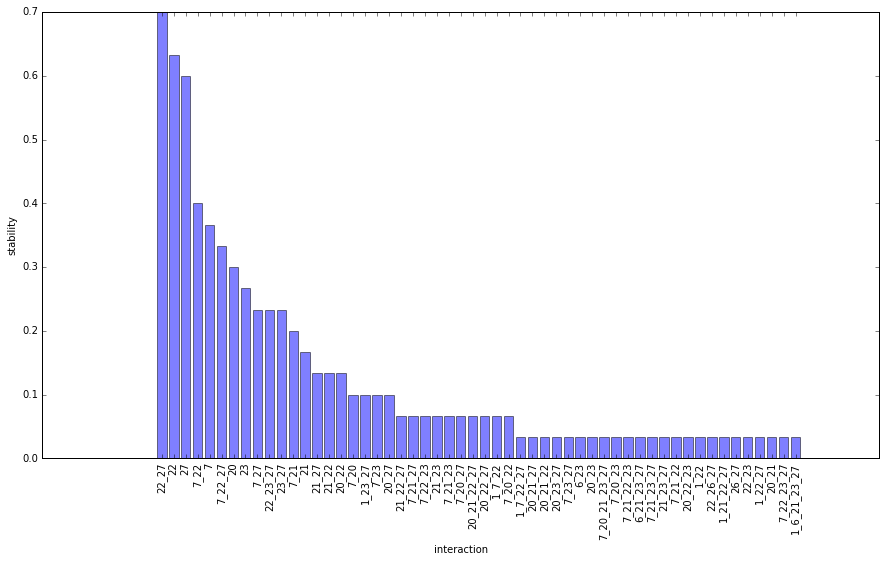

In [19]:
irf_jupyter_utils._get_histogram(stability_score, sort = True)

That's interesting - feature 22, 27, 20, 23 keep popping up!

We should probably look at the feature importances to understand if there is a useful correlation

# Examine feature importances
In particular, let us see how they change over the K iterations of random forest

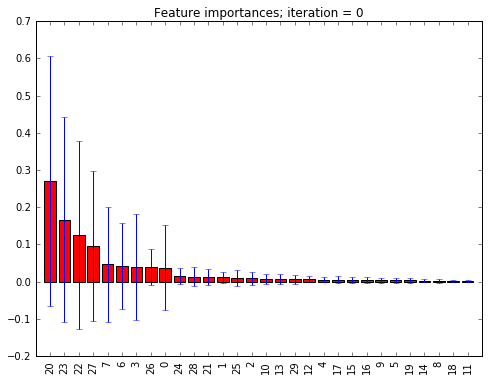

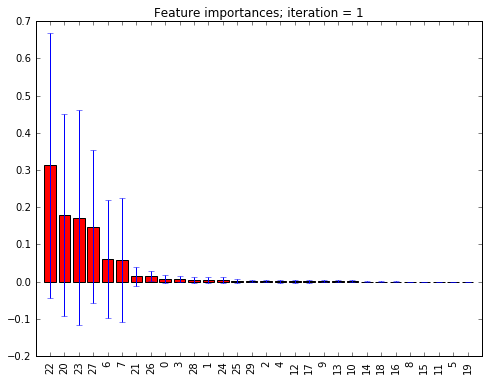

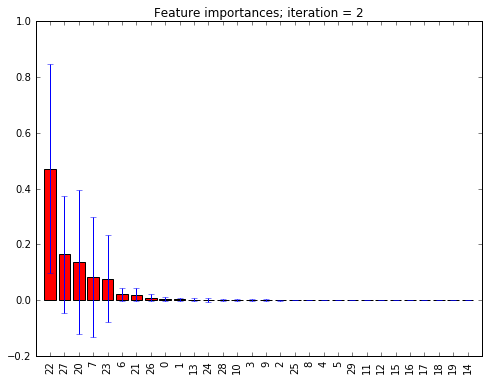

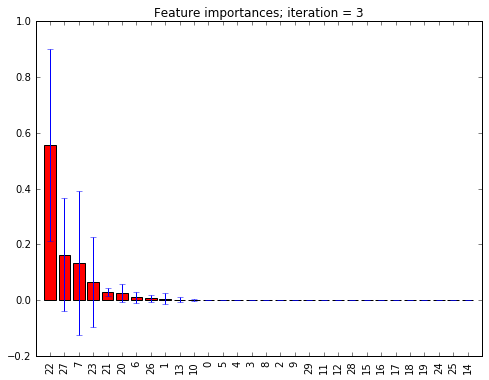

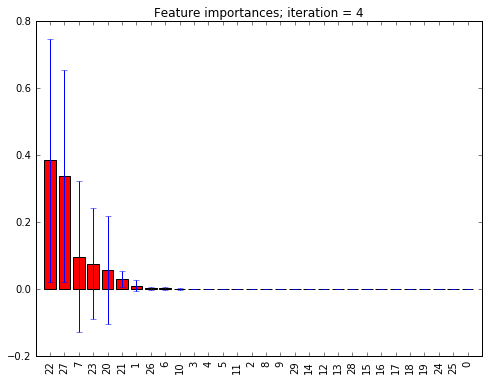

In [20]:
for k in range(5): 
    
    iteration = "rf_iter{}".format(k)
    
    feature_importances_std = all_K_iter_rf_data[iteration]['feature_importances_std']
    feature_importances_rank_idx = all_K_iter_rf_data[iteration]['feature_importances_rank_idx']
    feature_importances = all_K_iter_rf_data[iteration]['feature_importances']

    plt.figure(figsize=(8, 6))
    title = "Feature importances; iteration = {}".format(k)
    plt.title(title)
    plt.bar(range(X_train.shape[1])
            , feature_importances[feature_importances_rank_idx]
            , color="r"
            , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
    plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx, rotation='vertical')
    plt.xlim([-1, X_train.shape[1]])
    plt.show()   

## Some Observations
* Note that after 5 iterations, the most important features were found to be 22, 27, 7, and 23
* Now also recall that the most stable interactions were found to be '22_27', '7_22', '7_22_27', '23_27', '7_27', '22_23_27'
* Given the overlap between these two plots, the results are not unreasonable here. 

# Explore iRF Data Further

## We can look at the decision paths of the Kth RF

Let's look at the final iteration RF - the key validation metrics

In [21]:
irf_jupyter_utils.pretty_print_dict(all_K_iter_rf_data['rf_iter4']['rf_validation_metrics'])

{   'accuracy_score': 0.96491228070175439,
    'confusion_matrix': array([[12,  2],
       [ 0, 43]]),
    'f1_score': 0.97727272727272729,
    'hamming_loss': 0.035087719298245612,
    'log_loss': 1.2119149470996806,
    'precision_score': 0.9555555555555556,
    'recall_score': 1.0,
    'zero_one_loss': 0.035087719298245612}


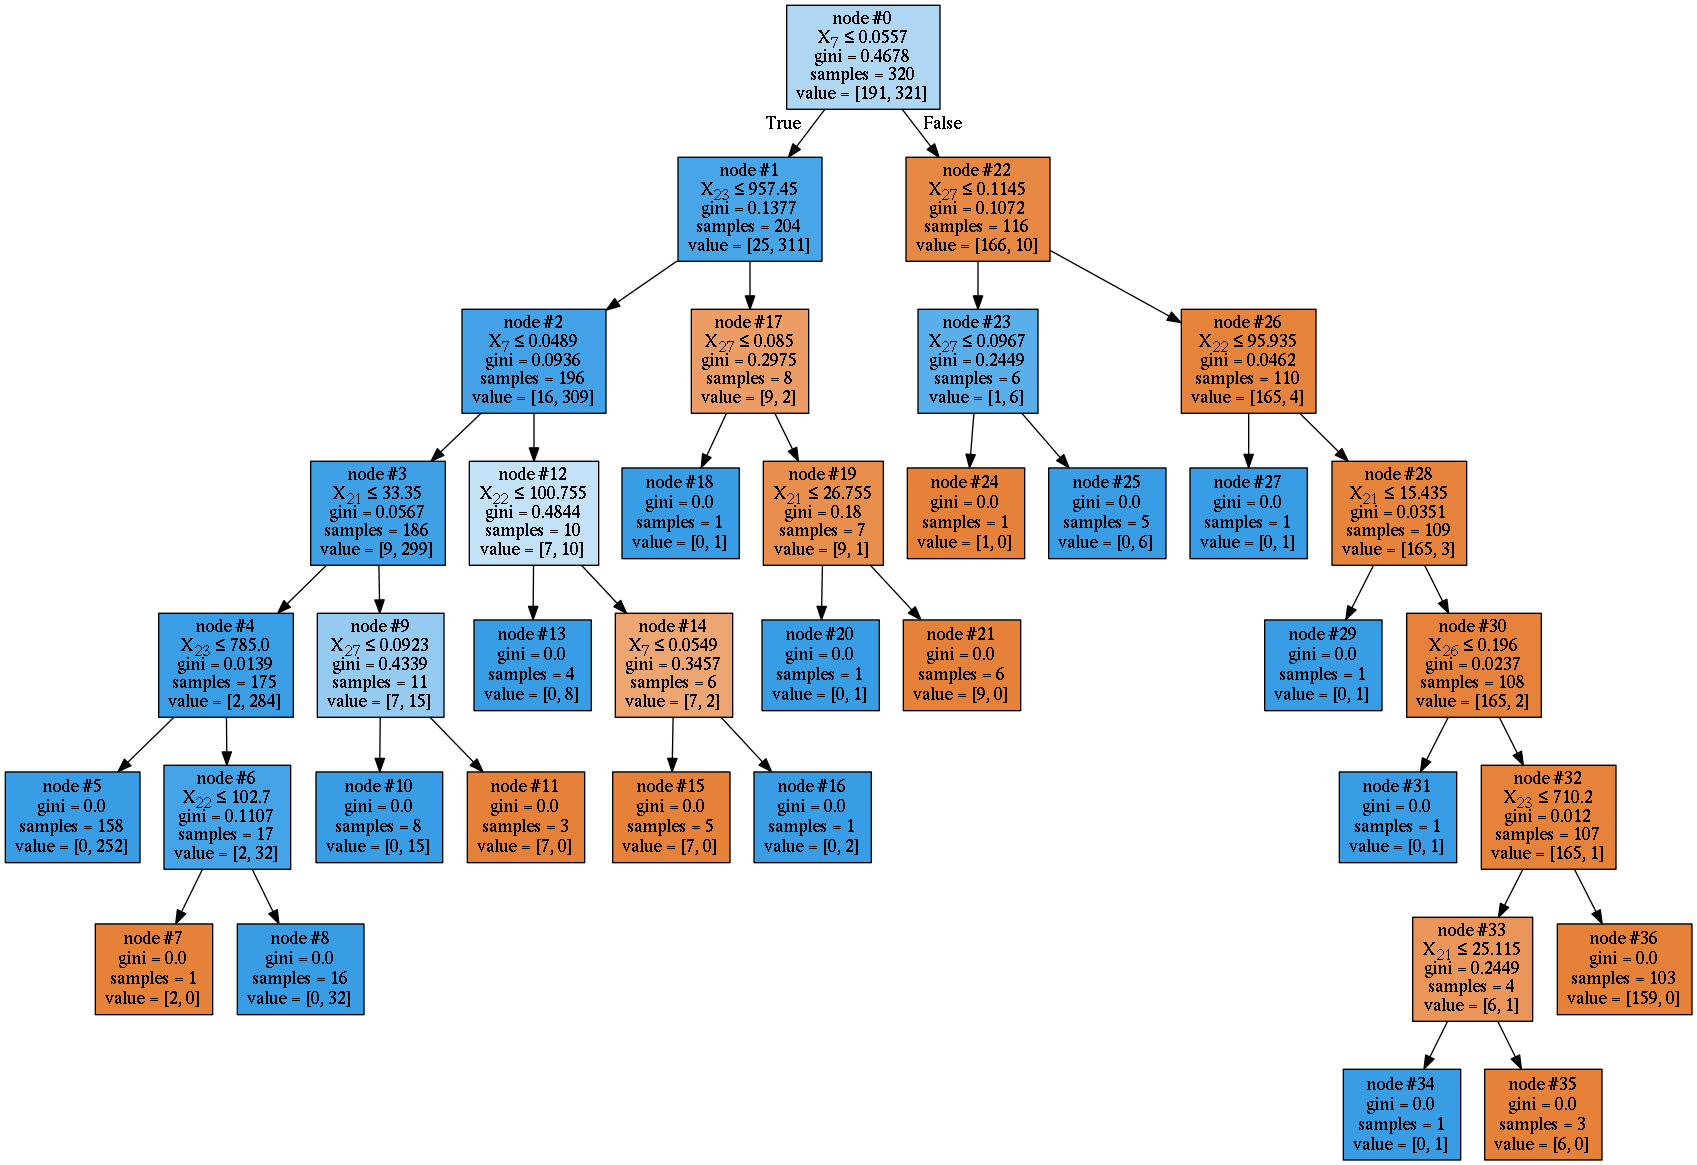

In [22]:
# Now plot the trees individually
irf_jupyter_utils.draw_tree(decision_tree = all_K_iter_rf_data['rf_iter4']['rf_obj'].estimators_[0])

### We can get this data quite easily in a convenient format

In [19]:
irf_jupyter_utils.pretty_print_dict(
    all_K_iter_rf_data['rf_iter4']['dtree0']['all_leaf_paths_features'])

[   array([ 7, 23,  7, 21, 23]),
    array([ 7, 23,  7, 21, 23, 22]),
    array([ 7, 23,  7, 21, 23, 22]),
    array([ 7, 23,  7, 21, 27]),
    array([ 7, 23,  7, 21, 27]),
    array([ 7, 23,  7, 22]),
    array([ 7, 23,  7, 22,  7]),
    array([ 7, 23,  7, 22,  7]),
    array([ 7, 23, 27]),
    array([ 7, 23, 27, 21]),
    array([ 7, 23, 27, 21]),
    array([ 7, 27, 27]),
    array([ 7, 27, 27]),
    array([ 7, 27, 22]),
    array([ 7, 27, 22, 21]),
    array([ 7, 27, 22, 21, 26]),
    array([ 7, 27, 22, 21, 26, 23, 21]),
    array([ 7, 27, 22, 21, 26, 23, 21]),
    array([ 7, 27, 22, 21, 26, 23])]


This checks nicely against the plotted diagram above.

In fact - we can go further and plot some interesting data from the Decision Trees
- This can help us understand variable interactions better

In [20]:
irf_jupyter_utils.pretty_print_dict(
    all_K_iter_rf_data['rf_iter4']['dtree0']['all_leaf_node_values'])

[   array([[  0, 252]]),
    array([[2, 0]]),
    array([[ 0, 32]]),
    array([[ 0, 15]]),
    array([[7, 0]]),
    array([[0, 8]]),
    array([[7, 0]]),
    array([[0, 2]]),
    array([[0, 1]]),
    array([[0, 1]]),
    array([[9, 0]]),
    array([[1, 0]]),
    array([[0, 6]]),
    array([[0, 1]]),
    array([[0, 1]]),
    array([[0, 1]]),
    array([[0, 1]]),
    array([[6, 0]]),
    array([[159,   0]])]


## We can also look at the frequency that a feature appears along a decision path

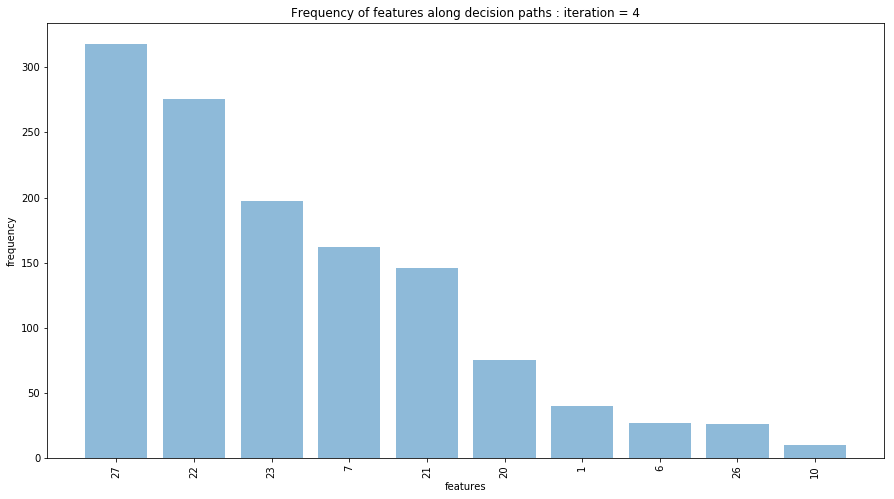

In [21]:
irf_jupyter_utils._hist_features(all_K_iter_rf_data['rf_iter4'], n_estimators = 20, \
                         title = 'Frequency of features along decision paths : iteration = 4')

The most common features that appeared were 27,22,23, and 7. This matches well with the feature importance plot above. 

# Run some Sanity Checks

## Run iRF for just 1 iteration - should be the uniform sampling version

This is just a sanity check: the feature importances from iRF after 1 iteration should match the feature importance from running a standard RF

In [22]:
all_K_iter_rf_data.keys()
print(all_K_iter_rf_data['rf_iter0']['feature_importances'])

[ 0.0378531   0.01143301  0.00917885  0.0389645   0.00570286  0.00355542
  0.04189169  0.04736217  0.00276282  0.00375928  0.00758323  0.00132309
  0.00668335  0.00753545  0.0027825   0.0043194   0.00388132  0.00557761
  0.00168787  0.00332904  0.26950483  0.01216281  0.12508337  0.16629184
  0.01540501  0.00929946  0.03860752  0.0959075   0.01366094  0.00691016]


Compare to the original single fitted random forest

In [23]:
rf = RandomForestClassifier(n_estimators=20, random_state=2018)
rf.fit(X=X_train, y=y_train)
print(rf.feature_importances_)

[ 0.0378531   0.01143301  0.00917885  0.0389645   0.00570286  0.00355542
  0.04189169  0.04736217  0.00276282  0.00375928  0.00758323  0.00132309
  0.00668335  0.00753545  0.0027825   0.0043194   0.00388132  0.00557761
  0.00168787  0.00332904  0.26950483  0.01216281  0.12508337  0.16629184
  0.01540501  0.00929946  0.03860752  0.0959075   0.01366094  0.00691016]


And they match perfectly as expected. 

In [24]:
all_rf_weights['rf_weight1']

array([ 0.0378531 ,  0.01143301,  0.00917885,  0.0389645 ,  0.00570286,
        0.00355542,  0.04189169,  0.04736217,  0.00276282,  0.00375928,
        0.00758323,  0.00132309,  0.00668335,  0.00753545,  0.0027825 ,
        0.0043194 ,  0.00388132,  0.00557761,  0.00168787,  0.00332904,
        0.26950483,  0.01216281,  0.12508337,  0.16629184,  0.01540501,
        0.00929946,  0.03860752,  0.0959075 ,  0.01366094,  0.00691016])

In [25]:
all_K_iter_rf_data

{'rf_iter0': {'dtree0': {'all_leaf_node_classes': [1,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    1,
    0,
    0],
   'all_leaf_node_paths': [array([0, 1, 2, 3, 4, 5, 6]),
    array([0, 1, 2, 3, 4, 5, 7, 8]),
    array([0, 1, 2, 3, 4, 5, 7, 9]),
    array([ 0,  1,  2,  3,  4, 10]),
    array([ 0,  1,  2,  3, 11, 12]),
    array([ 0,  1,  2,  3, 11, 13, 14]),
    array([ 0,  1,  2,  3, 11, 13, 15]),
    array([ 0,  1,  2, 16, 17, 18, 19]),
    array([ 0,  1,  2, 16, 17, 18, 20, 21, 22]),
    array([ 0,  1,  2, 16, 17, 18, 20, 21, 23]),
    array([ 0,  1,  2, 16, 17, 18, 20, 24]),
    array([ 0,  1,  2, 16, 17, 25]),
    array([ 0,  1,  2, 16, 26]),
    array([ 0,  1, 27, 28, 29]),
    array([ 0,  1, 27, 28, 30]),
    array([ 0,  1, 27, 31, 32]),
    array([ 0,  1, 27, 31, 33, 34]),
    array([ 0,  1, 27, 31, 33, 35, 36]),
    array([ 0,  1, 27, 31, 33, 35, 37]),
    array([ 0, 38, 39, 40]),
    array(

In [26]:
all_rf_bootstrap_output

{'rf_bootstrap0': {'dtree0': {'all_leaf_node_classes': [1, 1, 0, 0],
   'all_leaf_node_paths': [array([0, 1, 2]),
    array([0, 1, 3, 4]),
    array([0, 1, 3, 5]),
    array([0, 6])],
   'all_leaf_node_samples': [42, 1, 3, 18],
   'all_leaf_node_samples_percent': [65.625, 1.5625, 4.6875, 28.125],
   'all_leaf_node_values': [array([[ 0, 62]]),
    array([[0, 1]]),
    array([[4, 0]]),
    array([[36,  0]])],
   'all_leaf_nodes': [2, 4, 5, 6],
   'all_leaf_paths_features': [array([27, 22]),
    array([27, 22, 20]),
    array([27, 22, 20]),
    array([27])],
   'all_scaled_leaf_node_values': [array([[ 0.        ,  0.60194175]]),
    array([[ 0.        ,  0.00970874]]),
    array([[ 0.03883495,  0.        ]]),
    array([[ 0.34951456,  0.        ]])],
   'all_uniq_leaf_paths_features': [array([22, 27]),
    array([20, 22, 27]),
    array([20, 22, 27]),
    array([27])],
   'leaf_nodes_depths': [2, 3, 3, 1],
   'max_node_depth': 3,
   'n_nodes': 7,
   'node_features_idx': array([27, 22, 28,

In [27]:
all_rit_bootstrap_output

{'rf_bootstrap0': {'rit0': {'rit': <sklearn.tree.irf_utils.RITTree at 0x114f412e8>,
   'rit_intersected_values': [array([22, 27]),
    array([22]),
    array([], dtype=int64),
    array([22]),
    array([22]),
    array([], dtype=int64),
    array([], dtype=int64),
    array([22]),
    array([22]),
    array([], dtype=int64),
    array([22, 27]),
    array([22]),
    array([22]),
    array([22]),
    array([], dtype=int64),
    array([], dtype=int64),
    array([], dtype=int64)],
   'rit_leaf_node_union_value': array([22]),
   'rit_leaf_node_values': [array([], dtype=int64),
    array([], dtype=int64),
    array([], dtype=int64),
    array([22]),
    array([], dtype=int64),
    array([22]),
    array([], dtype=int64),
    array([], dtype=int64),
    array([], dtype=int64)]},
  'rit1': {'rit': <sklearn.tree.irf_utils.RITTree at 0x114f419e8>,
   'rit_intersected_values': [array([20]),
    array([], dtype=int64),
    array([20]),
    array([20]),
    array([20]),
    array([], dtype=int64

In [28]:
stability_score

{'1_21_22_27': 0.03333333333333333,
 '1_22': 0.03333333333333333,
 '1_22_27': 0.03333333333333333,
 '1_23_27': 0.1,
 '1_6_21_23_27': 0.03333333333333333,
 '1_7_22': 0.06666666666666667,
 '1_7_22_27': 0.03333333333333333,
 '20': 0.3,
 '20_21': 0.03333333333333333,
 '20_21_22': 0.03333333333333333,
 '20_21_22_27': 0.06666666666666667,
 '20_21_27': 0.03333333333333333,
 '20_22': 0.13333333333333333,
 '20_22_23': 0.03333333333333333,
 '20_22_27': 0.06666666666666667,
 '20_23': 0.03333333333333333,
 '20_23_27': 0.03333333333333333,
 '20_27': 0.1,
 '21': 0.16666666666666666,
 '21_22': 0.13333333333333333,
 '21_22_27': 0.06666666666666667,
 '21_23': 0.06666666666666667,
 '21_23_27': 0.03333333333333333,
 '21_27': 0.13333333333333333,
 '22': 0.6333333333333333,
 '22_23': 0.03333333333333333,
 '22_23_27': 0.23333333333333334,
 '22_26_27': 0.03333333333333333,
 '22_27': 0.7,
 '23': 0.26666666666666666,
 '23_27': 0.23333333333333334,
 '26_27': 0.03333333333333333,
 '27': 0.6,
 '6_21_23_27': 0.033

## End Wrapper test